In [1]:
from util import *
from cost import *

Image name (shape) (intensity max, min, mean, std)

original (240, 720) (210, 0, 49.3, 34.8)


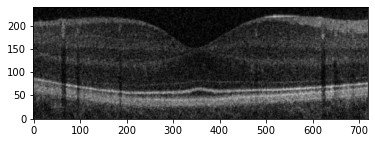

In [2]:
# Global variables

IMAGE_DIR = 'images'
IMAGE_NAME='original'
MASK = [320, 560, 160, 880] # ymin ymax xmin xmax
image = prep_image(IMAGE_DIR, IMAGE_NAME, MASK)

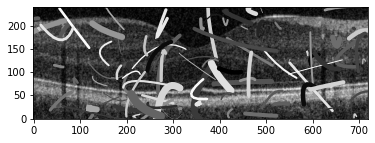

In [3]:
# Calling the cost should return the output directly from a clew of worms.
clew = initialise_clew(100, image.shape, (40, 30, 1))

drawing = Drawing(image)
drawing.add_worms(clew)
drawing.show()

In [4]:
from cost import * 
# Usage for calculating total cost for clew
cost_num = CostFunction.get_particle_cost(clew)
print(cost_num)

281.8219400108336
